In [28]:
# Team: Malvika, Laura, Chinmayee
# Course: Managing Analytic Projects
# Exploratory Data Analysis for State Drug Utilization Data, US, 2018
# About Dataset: Available at https://data.medicaid.gov/. States report drug utilization 
# for covered outpatient drugs paid for by state Medicaid agencies.

#Questions to ask:
# 1. What factors impact Total Amount Reimbursed?
# 2. How are these factors correlated?
# 3.

# We start off by dataset exploration, clean data, deal with missing values, provide summary statistics and 
# insights on correlation

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [38]:
df = pd.read_csv('Data.csv')
df.head()

,Utilization Type,State,Labeler Code,Product Code,Package Size,Year,Quarter,Product Name,Suppression Used,Units Reimbursed,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed,Quarter Begin,Quarter Begin Date,Latitude,Longitude,Location,NDC
0,FFSU,CT,57237,88,63,2018,4,Rizatripta,True,NaN,NaN,NaN,NaN,NaN,10/1,10/01/2018 12:00:00 AM,39.0646,-105.3272,"(39.0646, -105.3272)",57237008863
1,FFSU,GA,16571,330,16,2018,4,PHENOBARBI,False,79941.0,159.0,11530.17,11432.19,97.98,10/1,10/01/2018 12:00:00 AM,27.8333,-81.7170,"(27.8333, -81.717)",16571033016
2,FFSU,IA,591,3540,60,2018,4,BUPROPION,True,NaN,NaN,NaN,NaN,NaN,10/1,10/01/2018 12:00:00 AM,21.1098,-157.5311,"(21.1098, -157.5311)",591354060
3,FFSU,VA,53746,219,5,2018,4,METFORMIN,True,NaN,NaN,NaN,NaN,NaN,10/1,10/01/2018 12:00:00 AM,35.7449,-86.7489,"(35.7449, -86.7489)",53746021905
4,FFSU,CA,406,484,23,2018,3,ACETAMINOP,False,41.0,41.0,348.08,348.08,0.00,7/1,07/01/2018 12:00:00 AM,33.7712,-111.3877,"(33.7712, -111.3877)",406048423


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4759850 entries, 0 to 4759849
Data columns (total 20 columns):
Utilization Type                  object
State                             object
Labeler Code                      int64
Product Code                      int64
Package Size                      int64
Year                              int64
Quarter                           int64
Product Name                      object
Suppression Used                  bool
Units Reimbursed                  float64
Number of Prescriptions           float64
Total Amount Reimbursed           float64
Medicaid Amount Reimbursed        float64
Non Medicaid Amount Reimbursed    float64
Quarter Begin                     object
Quarter Begin Date                object
Latitude                          float64
Longitude                         float64
Location                          object
NDC                               int64
dtypes: bool(1), float64(7), int64(6), object(6)
memory usage: 694.5

In [41]:
#Provide summary statistics of the dataset
df.describe().transpose()

#We see that on average 304 prescriptions were made in 2018 while the average total amount reimbursed is $26576.10

,Labeler Code,Product Code,Package Size,Year,Quarter,Units Reimbursed,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed,Latitude,Longitude,NDC
count,4.759850e+06,4.759850e+06,4.759850e+06,4759850.0,4.759850e+06,2.250004e+06,2.250004e+06,2.250004e+06,2.250004e+06,2.250004e+06,4.477820e+06,4.477820e+06,4.759850e+06
mean,3.293914e+04,1.541638e+03,2.269512e+01,2018.0,2.498604e+00,3.928007e+04,6.456771e+02,5.622246e+04,5.246282e+04,3.759636e+03,3.736839e+01,-9.138506e+01,3.293930e+10
std,2.847433e+04,2.248107e+03,2.745832e+01,0.0,1.117410e+00,6.034514e+05,6.110054e+03,9.306758e+05,9.065876e+05,1.348515e+05,7.313918e+00,3.310047e+01,2.847422e+10
min,2.000000e+00,0.000000e+00,0.000000e+00,2018.0,1.000000e+00,1.900000e-02,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.424170e+01,-1.707197e+02,2.035302e+06
25%,5.360000e+02,1.960000e+02,1.000000e+00,2018.0,1.000000e+00,9.600000e+02,2.800000e+01,4.611600e+02,4.387000e+02,0.000000e+00,3.483750e+01,-1.062371e+02,5.363030e+08
50%,4.257100e+04,5.300000e+02,1.000000e+01,2018.0,2.000000e+00,2.796984e+03,6.800000e+01,1.650705e+03,1.568700e+03,0.000000e+00,3.851110e+01,-8.968120e+01,4.257102e+10
75%,6.170300e+04,1.632000e+03,3.100000e+01,2018.0,3.000000e+00,1.073500e+04,2.330000e+02,7.705240e+03,7.232283e+03,5.207000e+01,4.158340e+01,-7.820570e+01,6.170303e+10
max,9.920700e+04,9.999000e+03,9.900000e+01,2018.0,4.000000e+00,3.249037e+08,2.482815e+06,2.647645e+08,2.635669e+08,5.972058e+07,6.138500e+01,1.455505e+02,9.920709e+10


In [42]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64'), dtype('bool')]

In [43]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Labeler Code,Product Code,Package Size,Year,Quarter,Units Reimbursed,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed,Latitude,Longitude,NDC
0,57237,88,63,2018,4,NaN,NaN,NaN,NaN,NaN,39.0646,-105.3272,57237008863
1,16571,330,16,2018,4,79941.0,159.0,11530.17,11432.19,97.98,27.8333,-81.7170,16571033016
2,591,3540,60,2018,4,NaN,NaN,NaN,NaN,NaN,21.1098,-157.5311,591354060
3,53746,219,5,2018,4,NaN,NaN,NaN,NaN,NaN,35.7449,-86.7489,53746021905
4,406,484,23,2018,3,41.0,41.0,348.08,348.08,0.00,33.7712,-111.3877,406048423


In [58]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Number of variables,20
Number of observations,4759850
Total Missing (%),0.9%
Total size in memory,694.5 MiB
Average record size in memory,153.0 B
Numeric,10
Categorical,6
Boolean,1
Date,0
Text (Unique),0
Rejected,3


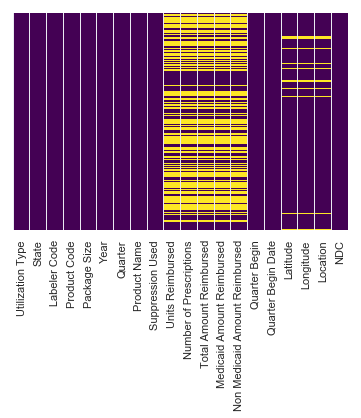

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
#Check for missing values using heatmap
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

#The yellow color indicates missing value in the dataset
#So we will rectify those columns where the missing values are indicated

In [47]:
import pandas as pd 
# Total missing values for each feature are indicated by '-1.0'
df['Units Reimbursed'].fillna(-1, inplace=True)
df['Total Amount Reimbursed'].fillna(-1, inplace=True)
df['Medicaid Amount Reimbursed'].fillna(-1, inplace=True)
df['Non Medicaid Amount Reimbursed'].fillna(-1, inplace=True)
df['Number of Prescriptions'].fillna(-1, inplace=True)
df.head()

,Utilization Type,State,Labeler Code,Product Code,Package Size,Year,Quarter,Product Name,Suppression Used,Units Reimbursed,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed,Quarter Begin,Quarter Begin Date,Latitude,Longitude,Location,NDC
0,FFSU,CT,57237,88,63,2018,4,Rizatripta,True,-1.0,-1.0,-1.00,-1.00,-1.00,10/1,10/01/2018 12:00:00 AM,39.0646,-105.3272,"(39.0646, -105.3272)",57237008863
1,FFSU,GA,16571,330,16,2018,4,PHENOBARBI,False,79941.0,159.0,11530.17,11432.19,97.98,10/1,10/01/2018 12:00:00 AM,27.8333,-81.7170,"(27.8333, -81.717)",16571033016
2,FFSU,IA,591,3540,60,2018,4,BUPROPION,True,-1.0,-1.0,-1.00,-1.00,-1.00,10/1,10/01/2018 12:00:00 AM,21.1098,-157.5311,"(21.1098, -157.5311)",591354060
3,FFSU,VA,53746,219,5,2018,4,METFORMIN,True,-1.0,-1.0,-1.00,-1.00,-1.00,10/1,10/01/2018 12:00:00 AM,35.7449,-86.7489,"(35.7449, -86.7489)",53746021905
4,FFSU,CA,406,484,23,2018,3,ACETAMINOP,False,41.0,41.0,348.08,348.08,0.00,7/1,07/01/2018 12:00:00 AM,33.7712,-111.3877,"(33.7712, -111.3877)",406048423


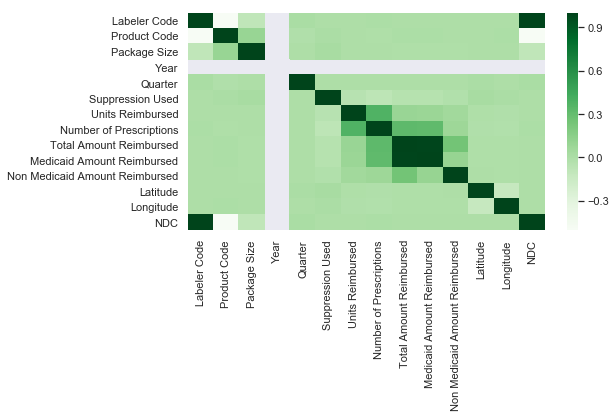

In [48]:
#Checking correlations in the dataset
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),cmap='Greens',annot=False)

#The darker shades of green indicate higher positive correlation while lighter the shade, higher the negative correlation
#We can see that Units reimbursed and number of prescriptions are highly positevely correlated, while amount reimbursed and number of prescriptions also 
#show a slight high positive correlation

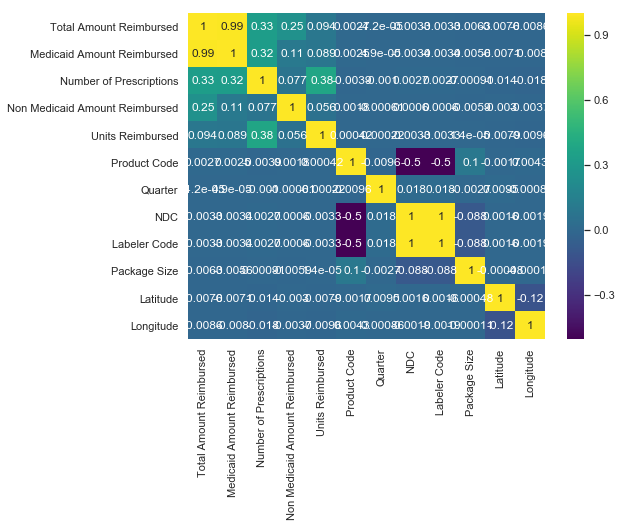

In [49]:
#A better correlation matrix with correlation values indicated
k = 12
cols = df.corr().nlargest(k, 'Total Amount Reimbursed')['Total Amount Reimbursed'].index
cm = df[cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

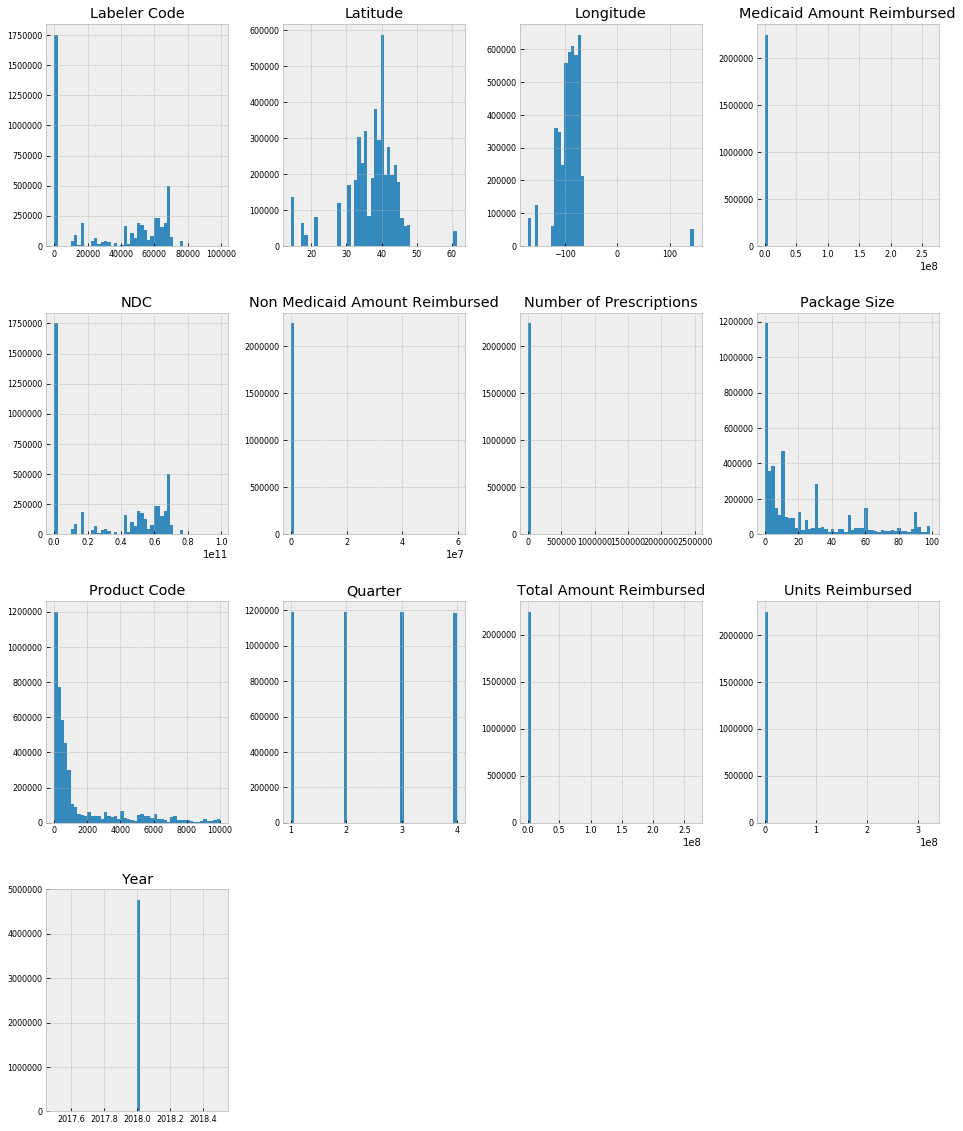

In [36]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations